<a href="https://colab.research.google.com/github/nalaurandrade/logicanebulosa/blob/main/Quest%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

import numpy as np

import skfuzzy as fuzz

from skfuzzy import control as ctrl



# DEFINIÇÕES DOS UNIVERSOS



# antecedentes, que serão as predições indicando a probabilidade do imóvel ser vendido e o seu valor

Classificação fuzzy final (0 = baixo, 50 = médio, 100 = alto):
56.46974075714387


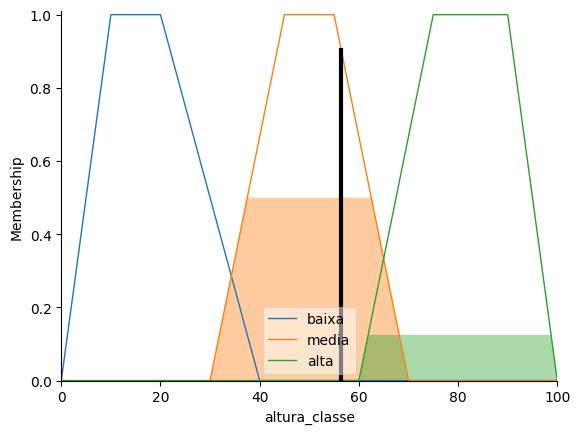

In [ ]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# =====================================================
# 1. DEFINIÇÃO DAS VARIÁVEIS (iguais ao artigo)
# =====================================================

# Saída do modelo de classificação (probabilidade de ser alto)
prob_alto = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'prob_alto')

# Saída do modelo de regressão (altura estimada em cm)
altura_prevista = ctrl.Antecedent(np.arange(100, 210.1, 0.1), 'altura_prevista')

# Saída fuzzy final
altura_classe = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'altura_classe')
# (0 = baixo, 50 = médio, 100 = alto)

# =====================================================
# 2. FUNÇÕES DE PERTINÊNCIA
# =====================================================

# ---- modelo de classificação (probabilidade) ----
prob_alto['baixa'] = fuzz.trimf(prob_alto.universe, [0.0, 0.0, 0.4])
prob_alto['media'] = fuzz.trimf(prob_alto.universe, [0.2, 0.5, 0.8])
prob_alto['alta']  = fuzz.trimf(prob_alto.universe, [0.6, 0.9, 1.0])

# ---- modelo de regressão (altura prevista) ----
altura_prevista['baixa'] = fuzz.trimf(altura_prevista.universe, [100, 130, 150])
altura_prevista['media'] = fuzz.trimf(altura_prevista.universe, [140, 165, 180])
altura_prevista['alta']  = fuzz.trimf(altura_prevista.universe, [170, 190, 210])

# ---- saída fuzzy final ----
altura_classe['baixa']  = fuzz.trapmf(altura_classe.universe, [0, 10, 20, 40])
altura_classe['media']  = fuzz.trapmf(altura_classe.universe, [30, 45, 55, 70])
altura_classe['alta']   = fuzz.trapmf(altura_classe.universe, [60, 75, 90, 100])

# =====================================================
# 3. REGRAS FUZZY (adaptadas do artigo)
# =====================================================

# Se probabilidade baixa → altura é baixa
regra1 = ctrl.Rule(prob_alto['baixa'], altura_classe['baixa'])

# Se probabilidade média OU previsão média → altura média
regra2 = ctrl.Rule(prob_alto['media'] | altura_prevista['media'], altura_classe['media'])

# Se probabilidade alta E previsão alta → altura alta
regra3 = ctrl.Rule(prob_alto['alta'] & altura_prevista['alta'], altura_classe['alta'])

# Se previsão baixa E prob média → altura baixa
regra4 = ctrl.Rule(prob_alto['media'] & altura_prevista['baixa'], altura_classe['baixa'])

# Se prob baixa mas altura prevista alta → altura média
regra5 = ctrl.Rule(prob_alto['baixa'] & altura_prevista['alta'], altura_classe['media'])

# Criando o sistema de controle
altura_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
engine = ctrl.ControlSystemSimulation(altura_ctrl)

# =====================================================
# 4. ENTRADAS DOS MODELOS (predições)
# =====================================================

engine.input['prob_alto'] = 0.81    # saída do modelo de classificação
engine.input['altura_prevista'] = 172.5  # saída do modelo de regressão

# Executa o sistema fuzzy
engine.compute()

# =====================================================
# 5. RESULTADOS
# =====================================================
print("Classificação fuzzy final (0 = baixo, 50 = médio, 100 = alto):")
print(engine.output['altura_classe'])

# Gráfico da saída
altura_classe.view(sim=engine)
